In [1]:
import OGRePy as gr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp


from scipy.integrate import solve_ivp

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.2.0 (2024-09-15)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="c:/Users/aweso/Documents/GitHub/quantum-black-holes/.venv/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="c:/Users/aweso/Documents/GitHub/quantum-black-holes/.venv/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///c:/Users/aweso/Documents/GitHub/quantum-black-holes/.venv/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

**OGRePy**: A new version of the package is available: **v1.3.0** ([view changelog](https://github.com/bshoshany/OGRePy/blob/master/CHANGELOG.md)). To update, please execute the following commands in a notebook cell:
```
%pip install --upgrade OGRePy
%reset --aggressive -f
import OGRePy as gr
```

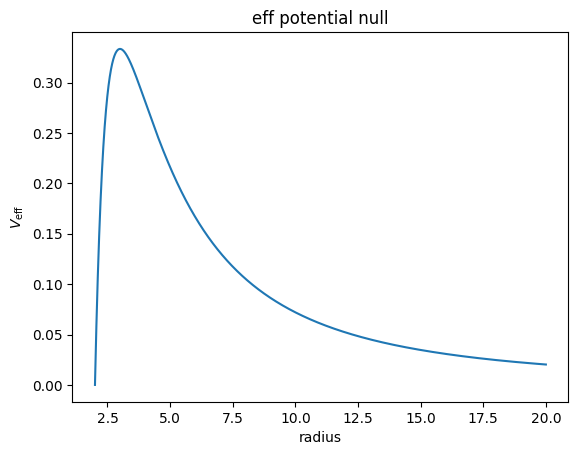

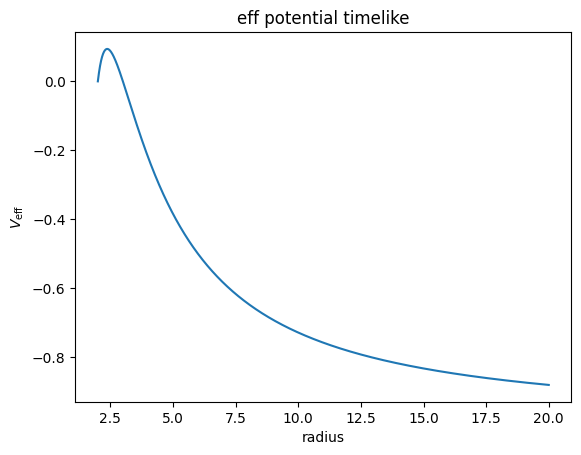

In [2]:




M = 1.0 #BH mass
sigma = 0 #null geodesic
E = 1.0 #particle energy
L = 3.0 #angular momentum of particle

#metric functions
def f(r, M):
    return 1 - 2 * M / r

def g(r, M):
    return (1 - 2 * M / r)**(-1)

def h(r):
    return r ** 2


def V_eff(r, L, simga=0):
    return f(r,M) * -(sigma - (L**2*h(r)**(-1)))

#schwarzschild radius
r_s = 2*M 

r_list = np.linspace(r_s, 10*r_s, 10000)

#calculate the effective potential
V_eff_list = [V_eff(r, L) for r in r_list]

#plot effective potential with sigma=0
plt.plot(r_list, V_eff_list)
plt.xlabel('radius')
plt.ylabel(r'$V_{\rm eff}$')
plt.title('eff potential null')
plt.show()

#plot effective potential with sigma=1
sigma=1
V_eff_list_sigma1 = [V_eff(r, L) for r in r_list]
plt.plot(r_list, V_eff_list_sigma1)
plt.xlabel('radius')
plt.ylabel(r'$V_{\rm eff}$')
plt.title('eff potential timelike')
plt.show()


In [3]:
import sympy as sp

def find_extrema(equation, variable_name='r', constants=None):
    """
    Determines the maxima and minima of an equation with one variable and optional constants.
    
    Args:
    equation (str): A string representation of the equation.
    variable_name (str): The variable in the equation. Defaults to 'r'.
    constants (list): List of constants used in the equation.

    Returns:
    dict: A dictionary containing critical points, maxima, minima, and saddle points.
    """
    # Define the variable
    r = sp.symbols(variable_name, real=True)  # Ensure r is treated as a real number
    
    # Define constants as symbolic variables if provided
    if constants:
        const_symbols = {const: sp.symbols(const, real=True) for const in constants}
    else:
        const_symbols = {}

    # Parse the equation into a SymPy expression
    expr = sp.sympify(equation, locals=const_symbols)
    
    # Compute the first derivative
    first_derivative = sp.diff(expr, r)
    
    # Find critical points by solving f'(r) = 0 using solveset (preferred over solve)
    critical_points = sp.solveset(first_derivative, r, domain=sp.S.Reals)
    
    # Compute the second derivative
    second_derivative = sp.diff(first_derivative, r)
    
    # Classify critical points using the second derivative test
    extrema = {"critical_points": [], "maxima": [], "minima": [], "saddle_points": []}

    # Process critical points
    if critical_points.is_FiniteSet:  # Ensure the result is a finite set
        for point in critical_points:
            second_derivative_at_point = second_derivative.subs(r, point)
            if second_derivative_at_point.is_number:
                if second_derivative_at_point > 0:
                    extrema["minima"].append(point)
                elif second_derivative_at_point < 0:
                    extrema["maxima"].append(point)
                else:
                    extrema["saddle_points"].append(point)
            extrema["critical_points"].append(point)

    return extrema

# Define the constants
constants = ['M=1', 'L=3', 'sigma=0']  # M, L, and sigma are constants

# Define the equation
equation = "(1 - 2 * M / r) * -(sigma - (L**2 / r**2))"  # Simplified fraction notation




# Call the function
results = find_extrema(equation, constants=constants)

# Print the results
print("Critical Points:", results["critical_points"])
print("Maxima:", results["maxima"])
print("Minima:", results["minima"])
print("Saddle Points:", results["saddle_points"])




Critical Points: []
Maxima: []
Minima: []
Saddle Points: []


In [4]:
#Null

M=1
L=3
r = gr.sym("r", nonnegative=True)

h=r**2
f=1-2*M/r



V_eff = -f*( sigma - L**2 /h)
dV_eff_dr = gr.s.diff(V_eff, r).subs(sigma, 0)
extrema = gr.s.solve(dV_eff_dr, r)

print('extrema: r=', extrema)


#timelike
L=3


V_eff = -f*( sigma - L**2 /h)
dV_eff_dr = gr.s.diff(V_eff, r).subs(sigma, 1)
extrema = gr.s.solve(dV_eff_dr, r)
print('extrema: r=', extrema)


extrema: r= []
extrema: r= [-9/2 + 3*sqrt(21)/2]


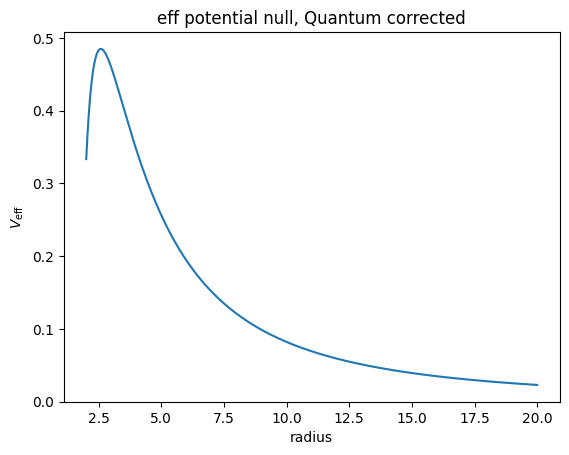

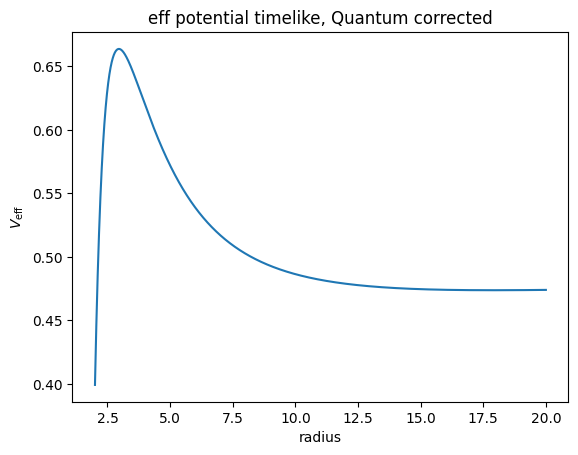

[ 2.          2.00180018  2.00360036 ... 19.99639964 19.99819982
 20.        ]


In [ ]:
###Veff Quantum###


M = 1.0 #BH mass
epsilon = 0 #null geodesic
E = 1.0 #particle energy
L = 4.5 #angular momentum of particle
Qb=1
Qc=1


#metric functions
def f2(r, M):
    return -(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))

def g2(r, M):
    return ((1+(Qc*r_s**2)/(4*r**8))**(1/4))*((1-(r_s)/((r**2+Qb)**(1/2)))**(-1))

def h2(r, M):
    return (r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4))


def V_eff2(r, L):
    return -(1/2)*f2(r, M) * (((L**2)/h2(r, M))+epsilon)

#schwarzschild radius
r_s = 2*M 

r_list = np.linspace(r_s, 10*r_s, 10000)

#calculate the effective potential
V_eff2_list = [V_eff2(r, L) for r in r_list]

#plot effective potential with epsilonma=0
plt.plot(r_list, V_eff2_list)
plt.xlabel('radius')
plt.ylabel(r'$V_{\rm eff}$')
plt.title('eff potential null, Quantum corrected')
plt.show()

#plot effective potential with epsilon=1
epsilon=1
V_eff2_list_timelike = [V_eff2(r, L) for r in r_list]
plt.plot(r_list, V_eff2_list_timelike)
plt.xlabel('radius')
plt.ylabel(r'$V_{\rm eff}$')
plt.title('eff potential timelike, Quantum corrected')
plt.show()

print(r_list)

C:\Users\aweso\AppData\Local\Temp\ipykernel_16540\573692078.py:14: RuntimeWarning: divide by zero encountered in divide
  return -(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))
C:\Users\aweso\AppData\Local\Temp\ipykernel_16540\573692078.py:14: RuntimeWarning: invalid value encountered in multiply
  return -(1+Qb/(r**2))*((1+(Qc+r_s**2)/(4*r**8))**(-1/4))*(1-(r_s)/((r**2+Qb)**(1/2)))
C:\Users\aweso\AppData\Local\Temp\ipykernel_16540\573692078.py:20: RuntimeWarning: divide by zero encountered in divide
  return (r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4))
C:\Users\aweso\AppData\Local\Temp\ipykernel_16540\573692078.py:20: RuntimeWarning: invalid value encountered in multiply
  return (r**2)*((1+(Qc*(r_s**2))/(4*r**8))**(1/4))


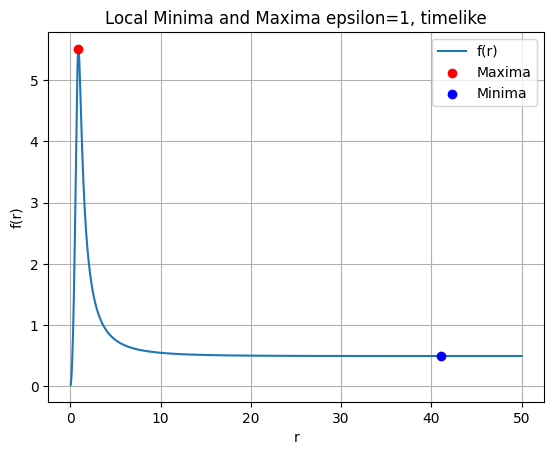

[0.9009009]
[41.04104104]


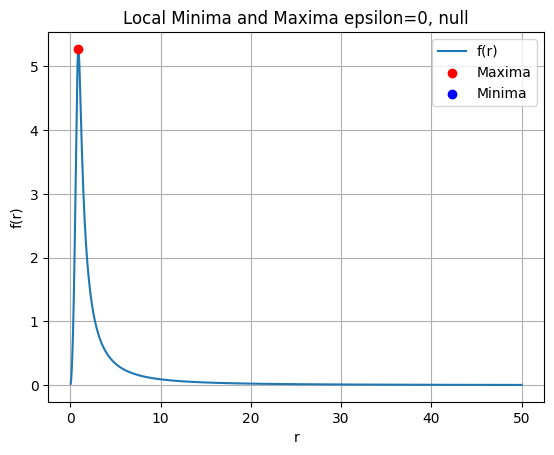

[0.9009009]
[]


In [34]:
import numpy as np

# Define constants
epsilon = 1 
L = 4.5 
Qb = 1
Qc = 1
r_s = 1  # Ensure r_s is defined

import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

def find_extrema(func, r_range, num_points=1000):
    r_values = np.linspace(r_range[0], r_range[1], num_points)
    f_values = func(r_values)
    
    # Find local maxima and minima
    maxima_indices = argrelextrema(f_values, np.greater)[0]
    minima_indices = argrelextrema(f_values, np.less)[0]
    
    maxima = r_values[maxima_indices]
    minima = r_values[minima_indices]
    
    return maxima, minima, r_values, f_values

# Example function
def V_eff2(r, L):
    return -(1/2)*f2(r, M) * (((L**2)/h2(r, M))+epsilon)

# Define range
r_range = (0, 50)

# Find extrema EPSILON=1
maxima1, minima1, r_values, f_values = find_extrema(function, r_range)

# Plot results
plt.plot(r_values, f_values, label='f(r)')
plt.scatter(maxima1, function(maxima1), color='red', label='Maxima', zorder=3)
plt.scatter(minima1, function(minima1), color='blue', label='Minima', zorder=3)
plt.legend()
plt.xlabel('r')
plt.ylabel('f(r)')
plt.title('Local Minima and Maxima epsilon=1, timelike')
plt.grid()
plt.show()
print(maxima1)
print(minima1)

# Find extrema EPSILON=0
epsilon=0
maxima0, minima0, r_values, f_values = find_extrema(function, r_range)

# Plot results
plt.plot(r_values, f_values, label='f(r)')
plt.scatter(maxima0, function(maxima0), color='red', label='Maxima', zorder=3)
plt.scatter(minima0, function(minima0), color='blue', label='Minima', zorder=3)
plt.legend()
plt.xlabel('r')
plt.ylabel('f(r)')
plt.title('Local Minima and Maxima epsilon=0, null')
plt.grid()
plt.show()
print(maxima0)
print(minima0)

 

In [6]:
###extrema Quantum corrected########
#Null

r = gr.sym("r", nonnegative=True)
Qb=1
Qc=1
M=1
r_s=2*M
epsilon=0
L=3



V_eff = -(1/2) * (
    - (1 + Qb/(r**2)) * ((1 + (Qc + r_s**2)/(4*r**8))**(-1/4)) * (1 - (r_s)/((r**2 + Qb)**(1/2)))
) * (
    ((L**2) / ((r**2) * ((1 + (Qc * (r_s**2)) / (4*r**8))**(1/4)))) + epsilon
) 
dV_eff_dr = gr.s.diff(V_eff, r).subs(sigma, 0)
extrema = gr.s.solve(dV_eff_dr, r)

print('extrema: r=', extrema)


#timelike
epsilon=1
L=3


V_eff = -(1/2) * (
    - (1 + Qb/(r**2)) * ((1 + (Qc + r_s**2)/(4*r**8))**(-1/4)) * (1 - (r_s)/((r**2 + Qb)**(1/2)))
) * (
    ((L**2) / ((r**2) * ((1 + (Qc * (r_s**2)) / (4*r**8))**(1/4)))) + epsilon
) 
dV_eff_dr = gr.s.diff(V_eff, r).subs(sigma, 1)
extrema = gr.s.solve(dV_eff_dr, r)
print('extrema: r=', extrema)

extrema: r= []


KeyboardInterrupt: 

In [ ]:
import sympy as sp

def find_extrema(func, var, domain=None):
    # Compute first derivative
    derivative = sp.diff(func, var)
    
    # Find critical points (where derivative is zero or undefined)
    critical_points = sp.solveset(derivative, var, domain=sp.S.Reals)
    
    # Evaluate function at critical points and endpoints (if given)
    values = []
    if isinstance(critical_points, sp.FiniteSet):
        values.extend([(p, func.subs(var, p)) for p in critical_points])
    
    if domain:
        a, b = domain
        values.append((a, func.subs(var, a)))
        values.append((b, func.subs(var, b)))
    
    # Determine min and max
    min_val = min(values, key=lambda r: r[1])
    max_val = max(values, key=lambda r: r[1])
    
    return min_val, max_val




In [ ]:
# Define the variable
r = sp.Symbol('r', real=True, positive=True)

# Define the function with all constants set to 1
Qb=1
Qc=1
M=1
r_s=2*M
epsilon=1
L=3

#timelike, epsilon=1

f = -(1/2) * (
    - (1 + Qb/(r**2)) * ((1 + (Qc + r_s**2)/(4*r**8))**(-1/4)) * (1 - (r_s)/((r**2 + Qb)**(1/2)))
) * (
    ((L**2) / ((r**2) * ((1 + (Qc * (r_s**2)) / (4*r**8))**(1/4)))) + epsilon
)


# Find extrema within a reasonable domain (e.g., r in (0.1, 5) to avoid singularities at r=0)
min_ext, max_ext = find_extrema(f, r, domain=(0.1, 5))

print("Minimum:", min_ext)
print("Maximum:", max_ext)


#null, epsilon=0
epsilon =0
f = -(1/2) * (
    - (1 + Qb/(r**2)) * ((1 + (Qc + r_s**2)/(4*r**8))**(-1/4)) * (1 - (r_s)/((r**2 + Qb)**(1/2)))
) * (
    ((L**2) / ((r**2) * ((1 + (Qc * (r_s**2)) / (4*r**8))**(1/4)))) + epsilon
)


# Find extrema within a reasonable domain (e.g., r in (0.1, 5) to avoid singularities at r=0)
min_ext, max_ext = find_extrema(f, r, domain=(0.1, 5))

print("Minimum:", min_ext)
print("Maximum:", max_ext)


Minimum: (0.1, -4.72859039463811)
Maximum: (5, 0.429812921795308)
Minimum: (0.1, -4.25573135411037)
Maximum: (5, 0.113773955169889)


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Qb=1
Qc=1
M=1
r_s=2*M
epsilon=1
L=3


def find_extrema(f, var):
    # Compute the derivative
    df = sp.diff(f, var)
    
    # Solve for critical points (where df/dx = 0)
    critical_points = sp.solve(df, var)
    
    # Determine maxima and minima using second derivative test
    d2f = sp.diff(df, var)
    extrema = {'maxima': [], 'minima': []}
    
    for point in critical_points:
        second_derivative = d2f.subs(var, point)
        if second_derivative < 0:
            extrema['maxima'].append(point)
        elif second_derivative > 0:
            extrema['minima'].append(point)
    
    return extrema, df, d2f

# Example usage
r = sp.Symbol('r')
f = -(1/2) * (
    - (1 + Qb/(r**2)) * ((1 + (Qc + r_s**2)/(4*r**8))**(-1/4)) * (1 - (r_s)/((r**2 + Qb)**(1/2)))
) * (
    ((L**2) / ((r**2) * ((1 + (Qc * (r_s**2)) / (4*r**8))**(1/4)))) + epsilon
) 


extrema, df, d2f = find_extrema(f, r)

print("First derivative:", df)
print("Second derivative:", d2f)
print("Local Maxima:", extrema['maxima'])
print("Local Minima:", extrema['minima'])

# Visualization
f_lambdified = sp.lambdify(r, f, 'numpy')
x_vals = np.linspace(0.1, 10, 400)
y_vals = f_lambdified(x_vals)

plt.plot(x_vals, y_vals, label='f(r)')
plt.scatter([float(p) for p in extrema['maxima']], [float(f.subs(r, p)) for p in extrema['maxima']], color='red', label='Maxima')
plt.scatter([float(p) for p in extrema['minima']], [float(f.subs(r, p)) for p in extrema['minima']], color='blue', label='Minima')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.title('Function and its Local Extrema')
plt.show()

KeyboardInterrupt: 

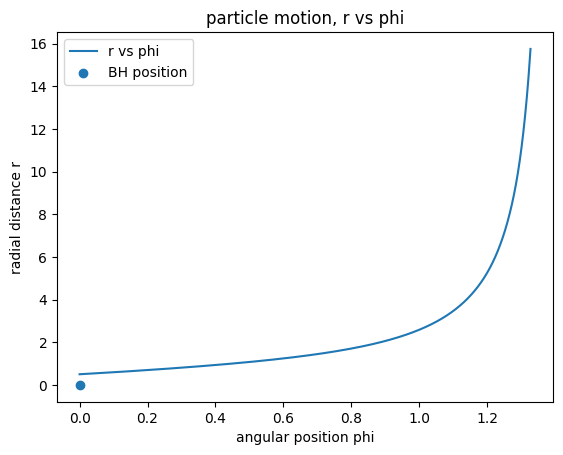

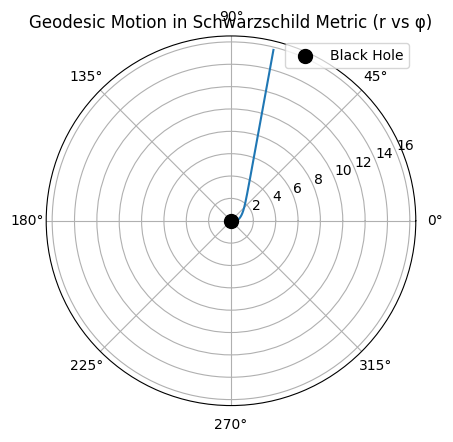

In [ ]:
M=1.0
c=1.0
G=1.0
E=1.0
L=1.0
rs1 = 2*G*M/c**2
#particle rad 10x sc rad
r1 = 10 * rs1  



def rad_sc(M):
    return (2*G*M/c**2)


#metric functions
def f(r, M):
    return 1 - 2 * M / r

def g(r, M):
    return (1 - 2 * M / r)**(-1)

def h(r):
    return r ** 2


# parameters
r0 = 0.25 * rs1  
paras = [E, L, M]




#equation of motion function
def EOM(tau, y, paras, sigma=1):

    t, r, phi = y

    E, L, M = paras

    #three main components
    dt_dtau = E/f(r, M)
    dphi_dtau = L/h(r)
    dr_dtau = np.sqrt(g(r, M)**(-1) * (f(r, M)**(-1) * E**2 + (sigma - L**2 / h(r))))

    return [dt_dtau, dr_dtau, dphi_dtau]



#solver function for r(phi) sols
def solve_r_phi(paras, phi_range, r_init, sigma=0):

    E, L, M = paras


    # initial conditions
    y0 = [0, r_init, phi_range[0]]

    def dr_dphi(tau, y):
        return EOM(tau, y, paras, sigma)

    #solutions for r(phi)
    sol = solve_ivp(dr_dphi, phi_range, y0, t_eval=np.linspace(*phi_range, 1000), dense_output=True)
    return sol

#solver func for r and phi sols
def solve_r_phi_t(paras, t_range, r_init, phi_init, sigma=0):

    E, L, M = paras


    # initial conditions
    y0 = [0, r_init, phi_init]  

    def dy_dt(tau, y):
        return EOM(tau, y, paras, sigma)

    # solve for r(t) and phi(t)
    sol = solve_ivp(dy_dt, t_range, y0, t_eval=np.linspace(*t_range, 1000))
    return sol




#get sols for r as func of phi
phi_range = [0, 2*np.pi]

r_phi_sol = solve_r_phi(paras, phi_range, r0, sigma=1)
phi_vals = r_phi_sol.t  
r_vals_orbit = r_phi_sol.y[1]  



#get solutions for r(t) and phi(t)
t_range = [0, 15]
r_init = 0.25 * rs1
phi_init = 0

sol_t = solve_r_phi_t(paras, t_range, r_init, phi_init, sigma=0)
t_vals = sol_t.y[0]  # time values
r_vals = sol_t.y[1]  # radial distances
phi_vals = sol_t.y[2]  # angular positions

#plot r(t) vs phi(t)
plt.plot(phi_vals, r_vals, label='r vs phi')
plt.scatter([0], [0], label='BH position')
plt.xlabel('angular position phi')
plt.ylabel('radial distance r')
plt.title('particle motion, r vs phi')
plt.legend()
plt.show()


#plot polar
plt.polar(phi_vals, r_vals)
plt.scatter([0], [0], color='black', marker='o', s=100, label='Black Hole', zorder=5)
plt.title('Geodesic Motion in Schwarzschild Metric (r vs φ)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def eq_of_motion(lamda, y, params, epsilon=0):

    t, r, phi = y
    E, L, M, Qb, Qc = params

    dt_dlamda = - E / f(r, M, Qb, Qc)
    dphi_dlamda = L / h(r, M, Qc)
    # **** (+) if going away from BH; (-) if going towards the BH ****
    dr_dlamda = gr.s.sqrt(-g(r, M, Qb, Qc)**(-1) * (E**2 / f(r, M, Qb, Qc) + (L**2 / h(r, M, Qc) + epsilon)))
    #dr_dlamda = -gr.s.sqrt(-g(r, M, Q_b, Q_c)**(-1) * (E**2 / f(r, M, Q_b, Q_c) + (L**2 / h(r, M, Q_c) + epsilon)))

    return [dt_dlamda, dr_dlamda, dphi_dlamda]

